# MNIST with PyTorch

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

In [2]:
image_path = './'
transform = transforms.Compose([
    transforms.ToTensor()
])


mnist_train_dataset = torchvision.datasets.MNIST(
    root=image_path, train=True,
    transform=transform, download=True
)

mnist_test_dataset = torchvision.datasets.MNIST(
    root=image_path, train=False,
    transform=transform, download=True
)

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)

In [3]:
# MNIST dataset
mnist_train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [4]:
# DataLoader object
print(len(train_dl))
print(train_dl)

938


In [5]:
image_size = mnist_train_dataset[0][0].shape
print(image_size)

input_size = image_size[0] * image_size[1] * image_size[2]
print(input_size)

torch.Size([1, 28, 28])
784


In [6]:
hidden_units = [32, 16]
image_size = mnist_train_dataset[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]
all_layers = [nn.Flatten()]

for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
    
all_layers.append(nn.Linear(hidden_units[-1], 10))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
torch.manual_seed(1)
num_epochs = 20

for epoch in range(num_epochs):
    accuracy_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_train += is_correct.sum()
    accuracy_hist_train /= len(train_dl.dataset)
    print(f"Epoch {epoch} Accuracy {accuracy_hist_train:.4f}")

Epoch 0 Accuracy 0.8531
Epoch 1 Accuracy 0.9287
Epoch 2 Accuracy 0.9413
Epoch 3 Accuracy 0.9506
Epoch 4 Accuracy 0.9558
Epoch 5 Accuracy 0.9592
Epoch 6 Accuracy 0.9627
Epoch 7 Accuracy 0.9650
Epoch 8 Accuracy 0.9674
Epoch 9 Accuracy 0.9690
Epoch 10 Accuracy 0.9710
Epoch 11 Accuracy 0.9729
Epoch 12 Accuracy 0.9739
Epoch 13 Accuracy 0.9750
Epoch 14 Accuracy 0.9764
Epoch 15 Accuracy 0.9777
Epoch 16 Accuracy 0.9779
Epoch 17 Accuracy 0.9798
Epoch 18 Accuracy 0.9807
Epoch 19 Accuracy 0.9812


In [8]:
pred = model(mnist_test_dataset.data / 255.0)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f"Test accuracy: {is_correct.mean():.4f}")

Test accuracy: 0.9651


In [9]:
mnist_test_dataset.data.shape

torch.Size([10000, 28, 28])

In [10]:
print(len(mnist_test_dataset.targets))
mnist_test_dataset.targets

10000


tensor([7, 2, 1,  ..., 4, 5, 6])

## Improving the model

In [11]:
image_path = './'

# Data Augmentation
# Train set
transform_train = transforms.Compose([
    transforms.RandomCrop([28, 28]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([28, 28]),
    transforms.ToTensor()
])

# Validation and test sets
transform = transforms.Compose([
    transforms.CenterCrop([28, 28]),
    transforms.ToTensor()
])

# Load dataset
mnist_dataset = torchvision.datasets.MNIST(
    root=image_path, train=True,
    transform=transform, download=True
)

# Train/Validation/Test sets
from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset,
                             torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset,
                             torch.arange(10000, len(mnist_dataset)))

mnist_test_dataset = torchvision.datasets.MNIST(
    root=image_path, train=False,
    transform=transform, download=False
)
print('Train set:\t', len(mnist_train_dataset))
print('Valid set:\t', len(mnist_valid_dataset))
print('Test set:\t', len(mnist_test_dataset))

Train set:	 50000
Valid set:	 10000
Test set:	 10000


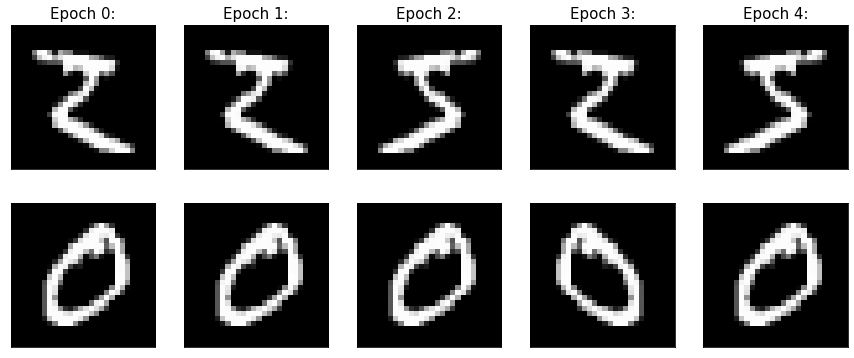

In [12]:
# Data Augmentation on the train set
import numpy as np
import matplotlib.pyplot as plt

mnist_train_dataset = torchvision.datasets.MNIST(
    root=image_path, train=True,
    transform=transform_train, download=True
)

torch.manual_seed(1)
data_loader = DataLoader(mnist_train_dataset, batch_size=2)
fig = plt.figure(figsize=(15, 6))
num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Epoch {j}:", size=15)
    # ax.imshow(img.permute(1, 2, 0))
    ax.imshow(img.permute(1, 2, 0), cmap='gray')
    
    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j + 6)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.imshow(img.permute(1, 2, 0))
    ax.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

In [13]:
print('Train set:\t', len(mnist_train_dataset))
print('Valid set:\t', len(mnist_valid_dataset))
print('Test set:\t', len(mnist_test_dataset))

Train set:	 60000
Valid set:	 10000
Test set:	 10000


In [14]:
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle=False)

## Constructing a CNN in PyTorch

In [15]:
model = nn.Sequential()

# Convolution layer 1
model.add_module(
    'conv1',
    nn.Conv2d(
        in_channels=1, out_channels=32,
        kernel_size=5, padding=2
    )
)
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))

# Convolution layer 2
model.add_module(
    'conv2',
    nn.Conv2d(
        in_channels=32, out_channels=64,
        kernel_size=5, padding=2
    )
)
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

In [16]:
x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 64, 7, 7])

In [17]:
model.add_module('flatten', nn.Flatten())
x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

In [18]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(1024, 10))

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()
        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f"Epoch {epoch+1} accuracy: "
              f"{accuracy_hist_train[epoch]:.4f} val_accuracy: "
              f"{accuracy_hist_valid[epoch]:.4f}")
    
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

## Train the CNN

In [21]:
torch.manual_seed(1)
num_epochs = 20  # epochs = 60 to achieve 0.9998 accuracy
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9200 val_accuracy: 0.9758
Epoch 2 accuracy: 0.9743 val_accuracy: 0.9838
Epoch 3 accuracy: 0.9802 val_accuracy: 0.9894
Epoch 4 accuracy: 0.9845 val_accuracy: 0.9902
Epoch 5 accuracy: 0.9861 val_accuracy: 0.9923
Epoch 6 accuracy: 0.9884 val_accuracy: 0.9936
Epoch 7 accuracy: 0.9896 val_accuracy: 0.9936
Epoch 8 accuracy: 0.9909 val_accuracy: 0.9915
Epoch 9 accuracy: 0.9917 val_accuracy: 0.9972
Epoch 10 accuracy: 0.9918 val_accuracy: 0.9955
Epoch 11 accuracy: 0.9933 val_accuracy: 0.9962
Epoch 12 accuracy: 0.9930 val_accuracy: 0.9969
Epoch 13 accuracy: 0.9943 val_accuracy: 0.9967
Epoch 14 accuracy: 0.9938 val_accuracy: 0.9970
Epoch 15 accuracy: 0.9948 val_accuracy: 0.9971
Epoch 16 accuracy: 0.9950 val_accuracy: 0.9947
Epoch 17 accuracy: 0.9947 val_accuracy: 0.9980
Epoch 18 accuracy: 0.9953 val_accuracy: 0.9983
Epoch 19 accuracy: 0.9961 val_accuracy: 0.9982
Epoch 20 accuracy: 0.9955 val_accuracy: 0.9985


## Visualize learning curves

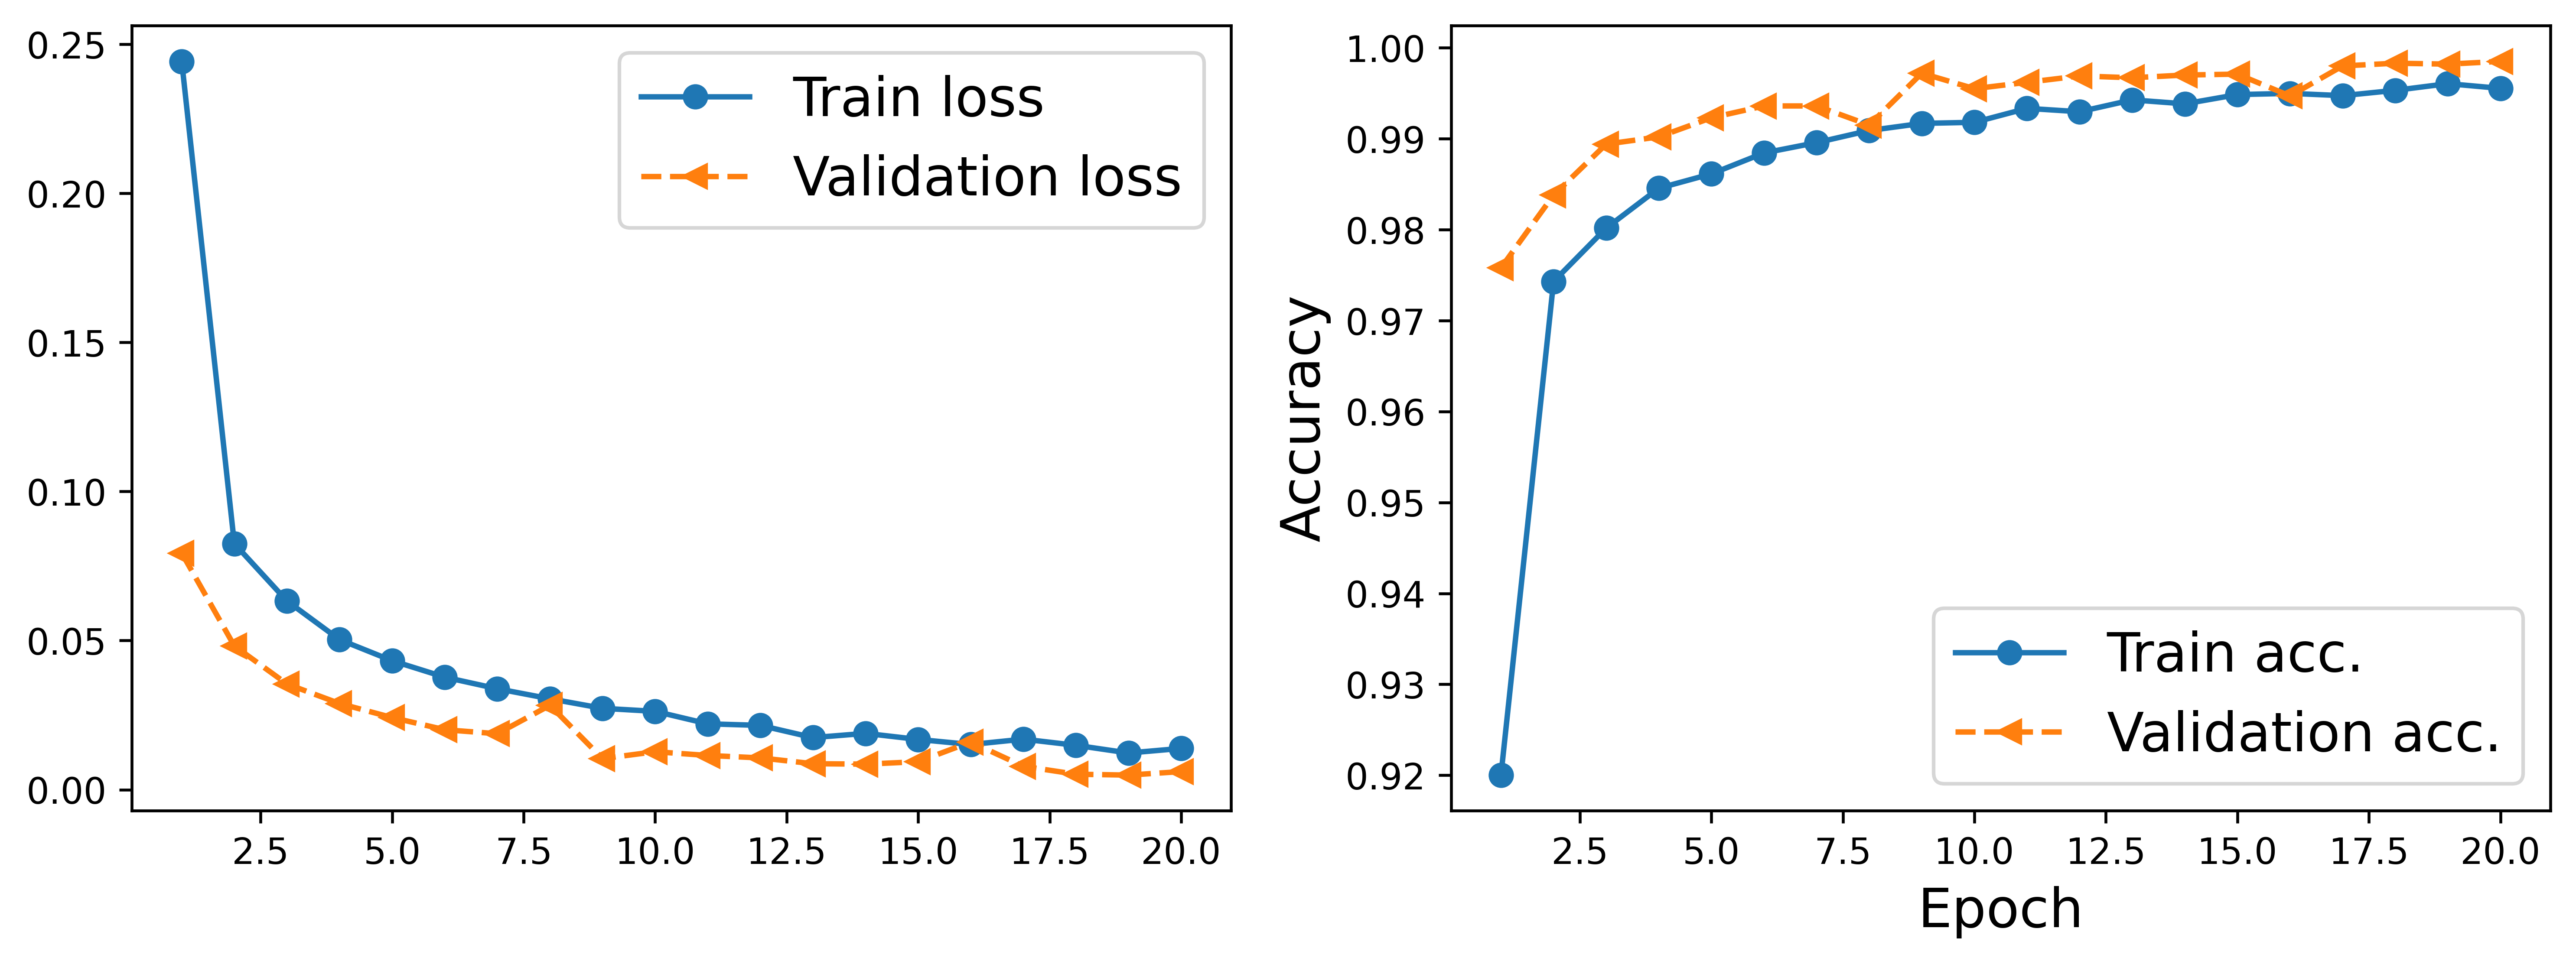

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4), dpi=600)

ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)

ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

## Evaluate the trained model on the test dataset

In [23]:
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.0)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f"Test accuracy: {is_correct.mean():.4f}")

Test accuracy: 0.9899


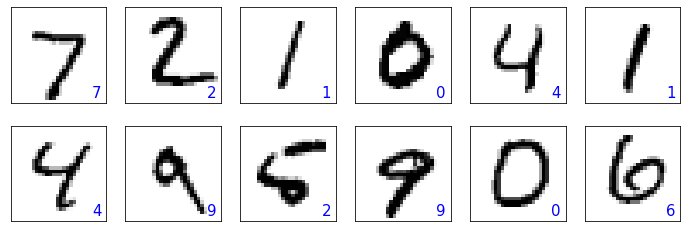

In [24]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = mnist_test_dataset[i][0][0, :, :]
    pred = model(img.unsqueeze(0).unsqueeze(1))
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, y_pred.item(),
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
plt.show()

### Train the network for 40 more epochs the get optimal accuracy

In [25]:
torch.manual_seed(1)
num_epochs = 40  # total epochs = 60 to achieve 0.9998 accuracy
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9965 val_accuracy: 0.9960
Epoch 2 accuracy: 0.9969 val_accuracy: 0.9985
Epoch 3 accuracy: 0.9972 val_accuracy: 0.9987
Epoch 4 accuracy: 0.9964 val_accuracy: 0.9983
Epoch 5 accuracy: 0.9972 val_accuracy: 0.9973
Epoch 6 accuracy: 0.9973 val_accuracy: 0.9986
Epoch 7 accuracy: 0.9970 val_accuracy: 0.9981
Epoch 8 accuracy: 0.9980 val_accuracy: 0.9961
Epoch 9 accuracy: 0.9972 val_accuracy: 0.9998
Epoch 10 accuracy: 0.9971 val_accuracy: 0.9981
Epoch 11 accuracy: 0.9976 val_accuracy: 0.9988
Epoch 12 accuracy: 0.9975 val_accuracy: 0.9994
Epoch 13 accuracy: 0.9975 val_accuracy: 0.9991
Epoch 14 accuracy: 0.9975 val_accuracy: 0.9995
Epoch 15 accuracy: 0.9981 val_accuracy: 0.9992
Epoch 16 accuracy: 0.9978 val_accuracy: 0.9974
Epoch 17 accuracy: 0.9975 val_accuracy: 0.9997
Epoch 18 accuracy: 0.9973 val_accuracy: 0.9989
Epoch 19 accuracy: 0.9975 val_accuracy: 0.9990
Epoch 20 accuracy: 0.9977 val_accuracy: 0.9990
Epoch 21 accuracy: 0.9967 val_accuracy: 0.9981
Epoch 22 accuracy: 0.9

In [26]:
# Evaluate model performance
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.0)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f"Test accuracy: {is_correct.mean():.4f}")

Test accuracy: 0.9904


## Submit predictions to Kaggle

In [27]:
import pandas as pd

In [28]:
# test = pd.read_csv(os.path.join(root, 'test.csv'))
test = pd.read_csv("./digit-recognizer/test.csv")
test = test.to_numpy(dtype='float32').reshape((-1, 1,28, 28)) / 255.0
test = torch.tensor(test)
test_dl = DataLoader(test, batch_size=64, shuffle=False)

In [29]:
def get_y_predictions():
    y_pred=[]
    model.eval()
    with torch.no_grad():
        for y in test_dl:
            pred = model(y)
            pred = np.argmax(pred, axis=1)
            y_pred = np.append(y_pred,pred.tolist())

    # print(len(y_pred))
    y_pred = [int(x) for x in y_pred]
    return y_pred

In [30]:
submission_df = pd.DataFrame()
image_id = [i for i in range(1, 28001)]
submission_df['ImageId'] = image_id
submission_df['Label'] = get_y_predictions()
submission_df.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [33]:
# submission_df.to_csv('submission2.csv', index = False)